# SENTIMENT ANALYSIS ON REVIEW OF NYKAA APP

##### 

##### Loading the 2 important libraries we need for sentiment analysis in jupytr notebook

##### 

In [ ]:
!pip install wordcloud

In [ ]:
!pip install textblob

##### 

##### importing all the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
from tkinter import *
import tkinter as tk
from ipywidgets import interact

##### 

##### 

##### loading the dataset that contains the review of the people on the nykaa app

In [2]:
df=pd.read_csv("app_review.csv")

##### displaying the first 5 rows using the .head() method

In [3]:
df.head()

,Unnamed: 0,content
0,0,Nice shopping app
1,1,Nykaa you yuyz are not giving my reward points...
2,2,Love it
3,3,Is cod available?
4,4,Its awesome


##### 

##### 

### PERFORMING THE DATA CLEANING AND DATA PROCESSING ON THE DATASET

##### 

##### as we see above we have got a column called as unnamed. lets drop it

In [4]:
df.drop(columns="Unnamed: 0",inplace=True)

##### 

##### now check the dataset using the head method

In [5]:
df.head()

,content
0,Nice shopping app
1,Nykaa you yuyz are not giving my reward points...
2,Love it
3,Is cod available?
4,Its awesome


##### 

##### displaying the shape of the dataset i.e the dimension

In [6]:
df.shape

(155544, 1)

##### 

##### displaying the columns name that are present in the dataset

In [7]:
df.columns

Index(['content'], dtype='object')

##### 

##### displaying the data types of the columns of the dataset 

In [8]:
df.dtypes

content    object
dtype: object

##### 

##### displaying the information of the dataset like the dtype of the columns, the number of non-null values and the memory usage by the dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155544 entries, 0 to 155543
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   content  155540 non-null  object
dtypes: object(1)
memory usage: 1.2+ MB


##### 

##### performing sentiment analysis using the textblob library

In [10]:
#first we create a function that will assign the polarity score to the text
def analyze(text):
#initialize a function that takes input parameter as the text
    
    if isinstance(text, str):  # Check if the text is a string or not
        blob=TextBlob(text) #creates a new textblob object to perform analysis
    #perform snetiment analysis using polarity property
        polarity=blob.sentiment.polarity
    #categorizing it into positive,negative and neutral groups
        if polarity>0:
            return "Positive"
        elif polarity<0:
            return "Negative"
        else:
            return "Neutral"
    

##### 

##### applying the above created analyze function on the content column and storing the result in the new column named as Category

In [11]:
df['Category']=df['content'].apply(analyze)


##### 

##### getting counts of the positive, negative and neutral reviews

In [12]:
df['Category'].value_counts()

Positive    125670
Neutral      19519
Negative     10351
Name: Category, dtype: int64

##### 

##### creating a countplot for the different categories of the review using the seaborn library

Text(0, 0.5, 'Count of Review')

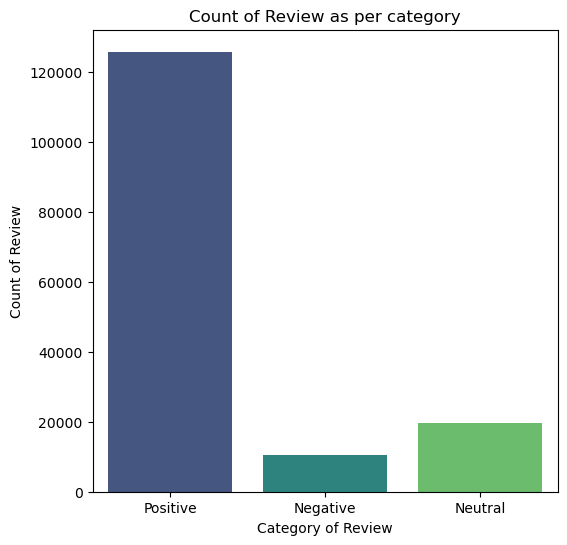

In [13]:
plt.figure(figsize=(6,6))
sns.countplot(x="Category",data=df,palette="viridis")
plt.title("Count of Review as per category")
plt.xlabel("Category of Review")
plt.ylabel("Count of Review")

##### 

##### now to create a word cloud we need to clean the dataset by removing all the null values from it

##### 

##### so we create a new dataset by dropping the nan values

In [14]:
data_cleaned = df.dropna(subset=['content'])

##### 

##### displaying head of this new dataset created

In [15]:
data_cleaned.head()

,content,Category
0,Nice shopping app,Positive
1,Nykaa you yuyz are not giving my reward points...,Positive
2,Love it,Positive
3,Is cod available?,Positive
4,Its awesome,Positive


##### 

##### creating a wordcloud

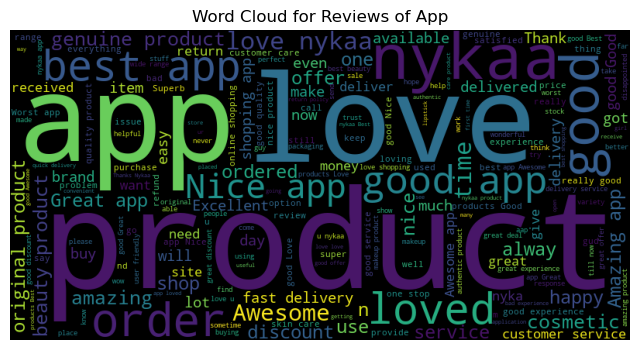

In [16]:
#creating a new variable that will craete a single string of all the reviews in the column
reviews = ' '.join(data_cleaned['content'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(reviews)

# Plot the word cloud using matplotlib
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Word Cloud for Reviews of App')
plt.show()

##### 

##### 

##### 

# PRODUCT REVIEW ANALYSIS

##### 

##### loading the dataset

In [17]:
product_data=pd.read_csv('Nykaa_Products_2023.csv')

##### 

##### displaying the first 5 rows using the .head() method

In [18]:
product_data.head()

,Unnamed: 0,Product Name,Reviews,Original Price,Offer Price,Discount,Free Gifts
0,0,L'Oreal Paris Glycolic Bright Serum With Glyco...,( 5109 ),MRP:₹749,₹599,20% Off,NaN
1,1,Nykaa Skin Secrets Gold Sheet Mask + Nykaa Ski...,( 25 ),MRP:₹1099,₹879,20% Off,Extra 10% Off
2,2,Dot & Key Vitamin C + E Face Sunscreen With SP...,( 3606 ),MRP:₹495,₹421,15% Off,Extra 5% Off
3,3,Olay Total Effects 7 In One Anti-Ageing Day Cr...,( 6046 ),MRP:₹798,₹638,20% Off,NaN
4,4,Nykaa SKINRX 10% Vitamin C with 5% Niacinamide...,( 1421 ),MRP:₹699,₹559,20% Off,NaN


##### 

##### as we have noticed that there is an extra unwanted column so we drop it 

In [19]:
product_data = product_data.drop(columns=['Unnamed: 0'])

##### 

##### to see the names of the columns present in the dataset, we use the .columns method

In [20]:
product_data.columns

Index(['Product Name', 'Reviews', 'Original Price', 'Offer Price', 'Discount',
       'Free Gifts'],
      dtype='object')

##### 

##### as the column anmes have spaces in it , we rename the columns

In [21]:
product_data = product_data.rename(columns={'Product Name': 'Product_Name','Original Price':'Original_Price','Offer Price':'Offer_Price','Free Gifts':'Free_Gifts'})

##### 

##### displaying the 1st row to see the changes

In [22]:
product_data.head(1)

,Product_Name,Reviews,Original_Price,Offer_Price,Discount,Free_Gifts
0,L'Oreal Paris Glycolic Bright Serum With Glyco...,( 5109 ),MRP:₹749,₹599,20% Off,NaN


##### 

##### finding the shape of the dataset

In [23]:
product_data.shape

(12000, 6)

##### 

##### finding the data types of the dataset using the dtypes method

In [24]:
product_data.dtypes

Product_Name      object
Reviews           object
Original_Price    object
Offer_Price       object
Discount          object
Free_Gifts        object
dtype: object

##### 

##### as we notice that te offer price has a rupees sign in it we remove it and convert the datatype from string to float

In [25]:
product_data['Offer_Price'] = product_data['Offer_Price'].str.replace(r'\₹', '').astype(float)

C:\Users\DELL\AppData\Local\Temp\ipykernel_20444\2363080247.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  product_data['Offer_Price'] = product_data['Offer_Price'].str.replace(r'\₹', '').astype(float)


##### also the reviews column have a bracket in it and it is in string type so we convert it to float type

In [26]:
product_data['Reviews'] = product_data['Reviews'].str.replace(r'\(|\)', '').astype(float)

C:\Users\DELL\AppData\Local\Temp\ipykernel_20444\1488165426.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  product_data['Reviews'] = product_data['Reviews'].str.replace(r'\(|\)', '').astype(float)


##### 

##### 

##### getting information about the dataset like non-null values , memory usage

In [27]:
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product_Name    12000 non-null  object 
 1   Reviews         11228 non-null  float64
 2   Original_Price  12000 non-null  object 
 3   Offer_Price     12000 non-null  float64
 4   Discount        8991 non-null   object 
 5   Free_Gifts      4073 non-null   object 
dtypes: float64(2), object(4)
memory usage: 562.6+ KB


##### 

##### getting the statistical description about the dataset

In [28]:
product_data.describe()

,Reviews,Offer_Price
count,11228.000000,12000.000000
mean,1693.342537,942.095917
std,8803.511169,1507.969864
min,1.000000,31.000000
25%,6.000000,272.000000
50%,52.000000,491.000000
75%,544.250000,1050.000000
max,188881.000000,33000.000000


In [29]:
product_data.head(1)

,Product_Name,Reviews,Original_Price,Offer_Price,Discount,Free_Gifts
0,L'Oreal Paris Glycolic Bright Serum With Glyco...,5109.0,MRP:₹749,599.0,20% Off,NaN


##### 

##### 

##### finding the maximum number of reviews that a product has and display the name of that product

In [30]:
a = product_data['Reviews'].max()  # Get the maximum value in the column


row = product_data[product_data['Reviews'] == a]
values1=row['Product_Name'].values
print("The highest review given is {0} and the Products with the highest review are : {1} ".format(a,values1))

The highest review given is 188881.0 and the Products with the highest review are : ['Nykaa Naturals Skin Secrets Exotic Indulgence Sheet Mask'
 'Nykaa Skin Secrets Exotic Indulgence Gold Sheet Mask For Rev...'
 'Nykaa Skin Secrets Exotic Indulgence Rose + Goat Milk Sheet ...'
 'Nykaa Skin Secrets Exotic Indulgence Honey + Lavender Sheet ...'
 'Nykaa Skin Secrets Exotic Indulgence Rice Water + White Tea ...'
 'Nykaa Skin Secrets Exotic Indulgence Strawberry + Argan Oil ...'
 'Nykaa Skin Secrets Exotic Indulgence Green Tea + Aloe Vera S...'
 'Nykaa Skin Secrets Exotic Indulgence Black Mud + Aloe Vera S...'
 'Nykaa Skin Secrets Exotic Indulgence Rice + Camellia Sheet M...'
 'Nykaa Skin Secrets Exotic Indulgence Acai Berry + Pomegranat...'
 'Nykaa Skin Secrets Exotic Indulgence Snail Sheet Mask For Fi...'
 'Nykaa Skin Secrets Exotic Indulgence Charcoal + Bamboo Sheet...'
 'Nykaa Skin Secrets Exotic Indulgence Avocado + Moringa Sheet...'
 'Nykaa Skin Secrets Exotic Indulgence Matcha Tea+Ch

##### 

##### displaying the product that has the least number of reviews

In [31]:
b = product_data['Reviews'].min()  # Get the maximum value in the column

# Extract the row(s) where the 'floats_column' has the maximum value
row = product_data[product_data['Reviews'] == b]
values=row['Product_Name'].values
print("The lowest review given is {0} and the Products with the lowest review are : {1} ".format(b,values))

The lowest review given is 1.0 and the Products with the lowest review are : ['The Ordinary Multi-Peptide Eye Serum'
 "L'Oreal Paris Glycolic Acid Glowing And Protecting C-S-M-S R..."
 'Amrutam Ayurvedic Travel Essentials Luxury Gift Bag'
 'Clinique Moisture Surge Value Set'
 'Nykaa Wanderlust Spanish Olive Shower Gel'
 'Mom & World Kidsy Natural Lip Balm - Kola Flavor + Fruit Can...'
 "Victoria's Secret 12 Days Of Discovery Fragrance Gift"
 'FOREO IRIS Illuminating Eye Massager - Mint'
 'Sol de Janeiro Bum Bum Beats Set'
 'Nykaa Naturals Skin Secrets Green Tea & Collagen Sleeping Ma...'
 "L'Oreal Paris Hyaluronic Acid Hydrating And Protecting C-S-M..."
 'Clinique Great Skin For Him'
 "Victoria's Secret Bombshell Fragrance Gift Set"
 'DIOR Capture Totale C.E.L.L. Energy Super Potent Age-Defying...'
 'Dove Deeply Nourishing Shower + Shaving Mousse With Cotton O...'
 'Recode Hyaluronic Acid Glow Mist'
 'The Body Shop Edelweiss Intense Smoothing Day Cream'
 'Lancome Advanced Genifique Yeu

##### 

##### 

##### creating a function to classify the product into different categories

In [32]:
def categorize_products(text):
    values = []

    if any(word in text.lower() for word in ['mask', 'peel']):
        values.append('Mask')

    if any(word in text.lower() for word in ['day cream', 'night cream', 'moistur', 'gel moisturizer', 'face oil']):
        values.append('Moisturizer')

    if any(word in text.lower() for word in ['face wash', 'cleansing balm', 'micellar water', 'cleansing milk']):
        values.append('Cleanser')

    if '%' in text.lower():
        values.append('Serum')

    if any(word in text.lower() for word in ['toner', 'toning']):
        values.append('Toner')

    if any(word in text.lower() for word in ['hydrating serum', 'anti-aging serum', 'vitamin c serum', 'serum']):
        values.append('Serum')

    if any(word in text.lower() for word in ['sunscreen', 'spf']):
        values.append('Sunscreen')

    if any(word in text.lower() for word in ['scrub', 'exfoliant', 'exfoliating']):
        values.append('Exfoliator')

    if 'eye' in text.lower():
        values.append('Eye Cream')

    if 'shampoo' in text.lower():
        values.append('Shampoo')

    if 'conditioner' in text.lower():
        values.append('Conditioner')

    if any(word in text.lower() for word in ['coconut oil', 'argan oil', 'hair serum', 'hair treatment oil']):
        values.append('Hair Oil')

    if any(word in text.lower() for word in ['hair styling gel', 'hair mousse', 'hair spray', 'heat protectant']):
        values.append('Styling')

    if any(word in text.lower() for word in ['parfum', 'perfume', 'mist', 'fragrance']):
        values.append('Perfumes')

    if 'brush' in text.lower():
        values.append('Makeup Brushes')

    if any(word in text.lower() for word in ['makeup sponges', 'beauty blenders', 'makeup applicators']):
        values.append('Beauty Blender')

    if any(word in text.lower() for word in ['hair straightener', 'hair curler', 'hair dryer', 'hair brushes']):
        values.append('Hair Tools')
        
    if 'tan' in text.lower():
        values.append('Tan Removal')
    if 'lipstick' in text.lower():
        values.append('LipStick')
    if 'roller' in text.lower():
        values.append('Rollers')
    if 'wipe' in text.lower():
        values.append('Wipes')
    if 'tablet' in text.lower():
        values.append('Tablets')
    if 'nail' in text.lower():
        values.append('Nail products')
    if 'soap' in text.lower():
        values.append('Soaps')
    return ', '.join(values) if values else 'Others'


##### 

##### applying the above created function on the product name column and storing it in a new column named as category

In [33]:
product_data['category'] = product_data['Product_Name'].apply(categorize_products)

In [34]:
product_data.head(2)

,Product_Name,Reviews,Original_Price,Offer_Price,Discount,Free_Gifts,category
0,L'Oreal Paris Glycolic Bright Serum With Glyco...,5109.0,MRP:₹749,599.0,20% Off,NaN,Serum
1,Nykaa Skin Secrets Gold Sheet Mask + Nykaa Ski...,25.0,MRP:₹1099,879.0,20% Off,Extra 10% Off,Mask


##### 

##### displaying the product with  the maximum offer price

In [35]:
offer = product_data['Offer_Price'].nlargest(5)  # Get the top 5 maximum values in 'Offer_Price'
rows = product_data[product_data['Offer_Price'].isin(offer)]

print("Products with the top 5 maximum prices:")
print(rows[['Product_Name','Offer_Price','category']])


Products with the top 5 maximum prices:
                                           Product_Name  Offer_Price category
1941   FOREO BEAR™ Microcurrent Facial Toning - Fuchsia      32980.0    Toner
3231  FOREO UFO™ 2 Supercharged Facial Skincare Devi...      27399.0   Others
4635  FOREO UFO™ 2 Supercharged Facial Skincare Devi...      27399.0   Others
5378  Shiseido Future Solution Lx Legendary Enmei Ul...      33000.0   Others
9516  FOREO UFO™ 2 Supercharged Facial Skincare Devi...      27399.0   Others


##### 

##### displaying the product with  the minimum offer price

In [36]:
om = product_data['Offer_Price'].nsmallest(5)  # Get the top 5 maximum values in 'Offer_Price'
rows = product_data[product_data['Offer_Price'].isin(om)]

print("Products with the top 5 minimum prices:")
print(rows[['Product_Name','Offer_Price','category']])


Products with the top 5 minimum prices:
                                     Product_Name  Offer_Price  \
863                             Himalaya Lip Balm         37.0   
1172            Himalaya Moisturizing Almond Soap         31.0   
1649  Himalaya Refreshing Cucumber & Coconut Soap         32.0   
2114     Himalaya Cream And Honey Nourishing Soap         32.0   
2842     Fem Fairness Naturals Pearl Bleach Creme         31.0   

                category  
863               Others  
1172  Moisturizer, Soaps  
1649               Soaps  
2114               Soaps  
2842              Others  


##### 

##### replacing the nan values in the Free_Gifts column to None for better analysis purpose

In [37]:
product_data['Free_Gifts']=product_data['Free_Gifts'].replace(np.nan,'None')

In [38]:
product_data.head()

,Product_Name,Reviews,Original_Price,Offer_Price,Discount,Free_Gifts,category
0,L'Oreal Paris Glycolic Bright Serum With Glyco...,5109.0,MRP:₹749,599.0,20% Off,None,Serum
1,Nykaa Skin Secrets Gold Sheet Mask + Nykaa Ski...,25.0,MRP:₹1099,879.0,20% Off,Extra 10% Off,Mask
2,Dot & Key Vitamin C + E Face Sunscreen With SP...,3606.0,MRP:₹495,421.0,15% Off,Extra 5% Off,Sunscreen
3,Olay Total Effects 7 In One Anti-Ageing Day Cr...,6046.0,MRP:₹798,638.0,20% Off,None,"Moisturizer, Sunscreen"
4,Nykaa SKINRX 10% Vitamin C with 5% Niacinamide...,1421.0,MRP:₹699,559.0,20% Off,None,Serum


##### 

##### getting the value counts of the various categories of the products

In [39]:
product_data['category'].value_counts()

Others                                            5197
Serum                                              714
Moisturizer                                        666
Mask                                               660
Exfoliator                                         652
                                                  ... 
Exfoliator, Eye Cream, Soaps                         1
Serum, Serum, Tan Removal                            1
Mask, Soaps                                          1
Exfoliator, Wipes                                    1
Moisturizer, Cleanser, Exfoliator, Tan Removal       1
Name: category, Length: 163, dtype: int64

##### 

##### as we see that there are many such values and it makes us difficult to understand it, so lets craete an interactive visual

In [68]:
from ipywidgets import interact
import matplotlib.pyplot as plt
number=int(input("enter the number of items to visual: "))
@interact(x=['Top', 'Bottom'])
def analysis(x):
    if x == 'Top':
        a = product_data['category'].value_counts().head(number)
        ax = a.plot(kind='bar')
       #this creates a for loop and iterates over each patch i.e the bar. Later it gets the value of the x axis of ecah bar , divide it by 2 to get the center for text alaignmnet
        #then it gets the height of each bar and converts it to string using the format matter to display it as text
        #ha aligns horizontally in center and va aligns vertically at bottom
        for p in ax.patches:
            ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='bottom')

        plt.title(f"Top {number} categories of Product")
        plt.xlabel("Category")
        plt.ylabel("Counts of products")
        plt.show()
    else:
        b = product_data['category'].value_counts().tail(number)
        ax = b.plot(kind='bar')
        #this creates a for loop and iterates over each patch i.e the bar. Later it gets the value of the x axis of ecah bar , divide it by 2 to get the center for text alaignmnet
        #then it gets the height of each bar and converts it to string using the format matter to display it as text
        #ha aligns horizontally in center and va aligns vertically at bottom
        for p in ax.patches:
            ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='bottom')
        plt.title(f"Bottom {number} categories of Product")
        plt.xlabel("Category")
        plt.ylabel("Counts of products")
        plt.show()


enter the number of items to visual: 8


interactive(children=(Dropdown(description='x', options=('Top', 'Bottom'), value='Top'), Output()), _dom_class…

##### 

##### 

##### creating a countplot for discount

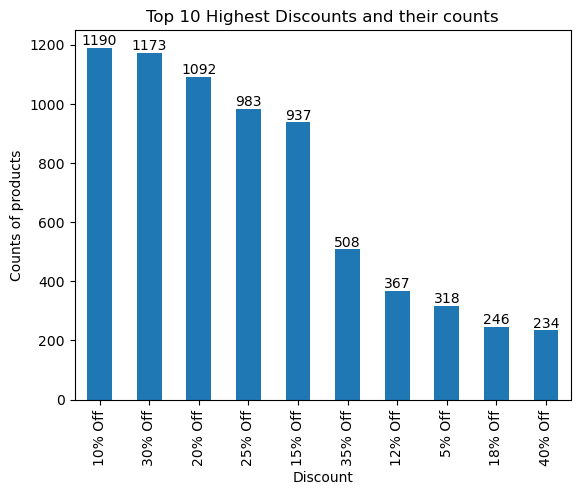

In [41]:
data = product_data['Discount'].value_counts().head(10)

# Creating the bar plot
ax = data.plot(kind='bar')
#this creates a for loop and iterates over each patch i.e the bar. Later it gets the value of the x axis of ecah bar , divide it by 2 to get the center for text alaignmnet
#then it gets the height of each bar and converts it to string using the format matter to display it as text
#ha aligns horizontally in center and va aligns vertically at bottom
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='bottom')

# Show plot
plt.title("Top 10 Highest Discounts and their counts")
plt.xlabel("Discount")
plt.ylabel("Counts of products")
plt.show()


##### 

##### creating a countplot for free gift

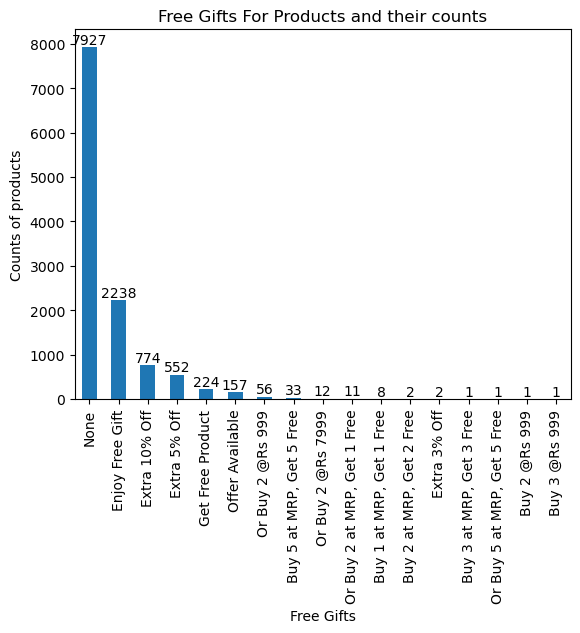

In [42]:
data1 = product_data['Free_Gifts'].value_counts()
# Creating the bar plot
ax = data1.plot(kind='bar')
#this creates a for loop and iterates over each patch i.e the bar. Later it gets the value of the x axis of ecah bar , divide it by 2 to get the center for text alaignmnet
#then it gets the height of each bar and converts it to string using the format matter to display it as text
#ha aligns horizontally in center and va aligns vertically at bottom
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='bottom')
plt.title("Free Gifts For Products and their counts")
plt.xlabel("Free Gifts")
plt.ylabel("Counts of products")
plt.show()


##### 

##### 

### PERFORMING ANALYSIS ON NYKAA PRODUCTS DATA OF 2022

##### 

##### loading the dataset

In [43]:
popular_product=pd.read_csv('nyka_popular_brands_products_2022_10_16.csv')

##### 

##### displaying the first 5 rows using the head method

In [44]:
popular_product.head()

,brand_name,product_id,image_url,in_stock,mrp,price,product_title,rating,rating_count,tags,product_url,listing_page_name,listing_url,listing_page_no
0,Herbal Essences,2659739,https://images-static.nykaa.com/media/catalog/...,True,1250,750,Herbal Essences Argan Oil Of Moroccan Shampoo ...,4.4,1008,"FEATURED, BESTSELLER",https://www.nykaa.com/herbal-essences-argan-oi...,Herbal Essences,https://www.nykaa.com/brands/herbal-essences/c...,1
1,Herbal Essences,1290145,https://images-static.nykaa.com/media/catalog/...,True,1575,1181,Herbal Essences Aloe & Bamboo Shampoo + Condit...,4.4,1034,FEATURED,https://www.nykaa.com/herbal-essences-potent-a...,Herbal Essences,https://www.nykaa.com/brands/herbal-essences/c...,1
2,Herbal Essences,456559,https://images-static.nykaa.com/media/catalog/...,True,1250,688,Herbal Essences Argan Oil Shampoo & Conditione...,4.3,10879,"FEATURED, BESTSELLER",https://www.nykaa.com/herbal-essences-argan-oi...,Herbal Essences,https://www.nykaa.com/brands/herbal-essences/c...,1
3,Herbal Essences,3753166,https://images-static.nykaa.com/media/catalog/...,True,1575,945,Herbal Essences Aloe & Bamboo Shampoo + Condit...,4.3,65,FEATURED,https://www.nykaa.com/herbal-essences-soha-alo...,Herbal Essences,https://www.nykaa.com/brands/herbal-essences/c...,1
4,Herbal Essences,5360837,https://images-static.nykaa.com/media/catalog/...,True,600,390,Herbal Essences Argan Oil Of Morocco Shampoo -...,4.3,8769,"FEATURED, BESTSELLER",https://www.nykaa.com/herbal-essences-argan-oi...,Herbal Essences,https://www.nykaa.com/brands/herbal-essences/c...,1


##### 

##### 

##### displaying the shape(dimensions) of the dataset

In [45]:
popular_product.shape

(3663, 14)

##### 

##### specifying the name of the columns using the .columns method

In [46]:
popular_product.columns

Index(['brand_name', 'product_id', 'image_url', 'in_stock', 'mrp', 'price',
       'product_title', 'rating', 'rating_count', 'tags', 'product_url',
       'listing_page_name', 'listing_url', 'listing_page_no'],
      dtype='object')

##### 

##### checking the datatypes of all the columns present in the dataset

In [47]:
popular_product.dtypes

brand_name            object
product_id             int64
image_url             object
in_stock              object
mrp                    int64
price                  int64
product_title         object
rating               float64
rating_count           int64
tags                  object
product_url           object
listing_page_name     object
listing_url           object
listing_page_no        int64
dtype: object

##### 

##### getting the statistical description about the dataset

In [48]:
popular_product.describe()

,product_id,mrp,price,rating,rating_count,listing_page_no
count,3.663000e+03,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000
mean,1.945670e+06,757.762217,613.470925,4.284848,7239.644554,9.852580
std,2.171661e+06,692.147866,590.075849,0.567004,18498.625476,9.212587
min,2.500000e+02,50.000000,41.000000,0.000000,0.000000,1.000000
25%,3.331645e+05,275.000000,220.000000,4.200000,114.000000,3.000000
50%,8.565000e+05,578.000000,446.000000,4.400000,781.000000,7.000000
75%,3.597392e+06,950.000000,763.000000,4.500000,5423.500000,13.000000
max,7.889173e+06,5375.000000,5375.000000,5.000000,180065.000000,41.000000


##### 

##### checking if any columns in the dataset contains and nan value and replace it with 0

In [49]:
popular_product.isna().sum()

brand_name              0
product_id              0
image_url               0
in_stock              300
mrp                     0
price                   0
product_title           0
rating                  0
rating_count            0
tags                 3358
product_url             0
listing_page_name       0
listing_url             0
listing_page_no         0
dtype: int64

In [50]:
popular_product=popular_product.fillna(0)

##### 

##### now checking the dataset to view the specified changes

In [51]:
popular_product.isna().sum()

brand_name           0
product_id           0
image_url            0
in_stock             0
mrp                  0
price                0
product_title        0
rating               0
rating_count         0
tags                 0
product_url          0
listing_page_name    0
listing_url          0
listing_page_no      0
dtype: int64

##### 

##### getting the information about how many products are in stock

In [52]:
popular_product['in_stock']=popular_product['in_stock'].replace(0,'False')

In [53]:
popular_product['in_stock'].value_counts()

True     3363
False     300
Name: in_stock, dtype: int64

##### this indicates that most of the products listed are in stock

##### 

##### creating a countplot for getting the counts for various products present at nykaa

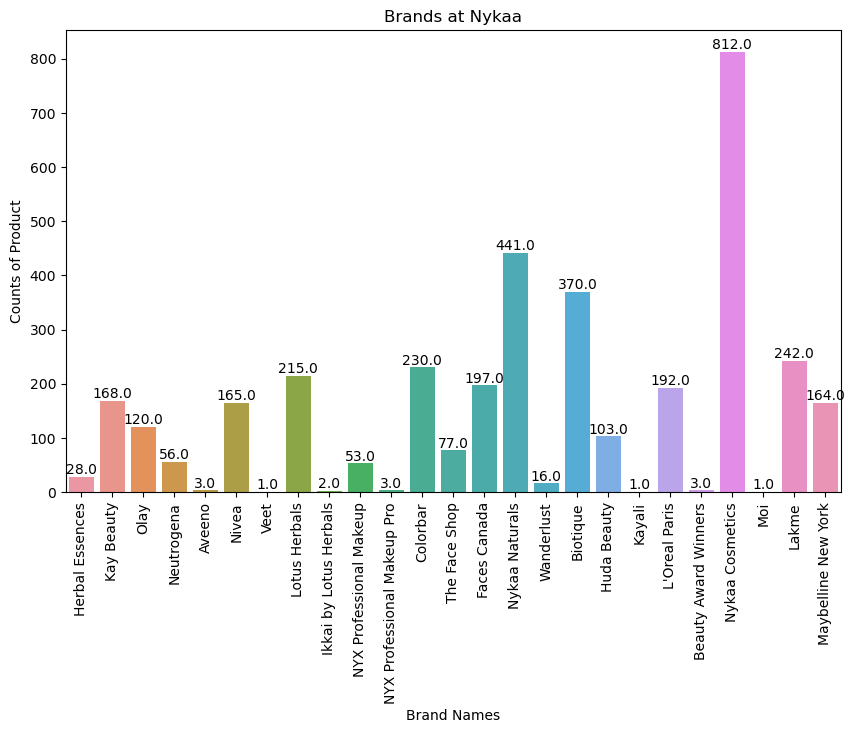

In [54]:
plt.figure(figsize=(10, 6))
x=popular_product['brand_name'].unique()
ax=sns.countplot(x='brand_name',data=popular_product)
plt.title('Brands at Nykaa')
plt.xlabel('Brand Names')
plt.ylabel('Counts of Product')
plt.xticks(rotation=90)

#this creates a for loop and iterates over each patch i.e the bar. Later it gets the value of the x axis of ecah bar , divide it by 2 to get the center for text alaignmnet
#then it gets the height of each bar and converts it to string using the format matter to display it as text
#ha aligns horizontally in center and va aligns vertically at bottom
for p in ax.patches:
    plt.text(p.get_x() + p.get_width() / 2., p.get_height(), format(p.get_height()), ha='center', va='bottom')
plt.show()

##### 

##### 

##### displaying the unique values that are present in the tags column 

In [55]:
popular_product['tags'].unique()

array(['FEATURED, BESTSELLER', 'FEATURED', 'BESTSELLER', 0, 'NEW',
       'FEATURED, NEW'], dtype=object)

##### 

##### visuallly displaying the count of the unique values in the tag column

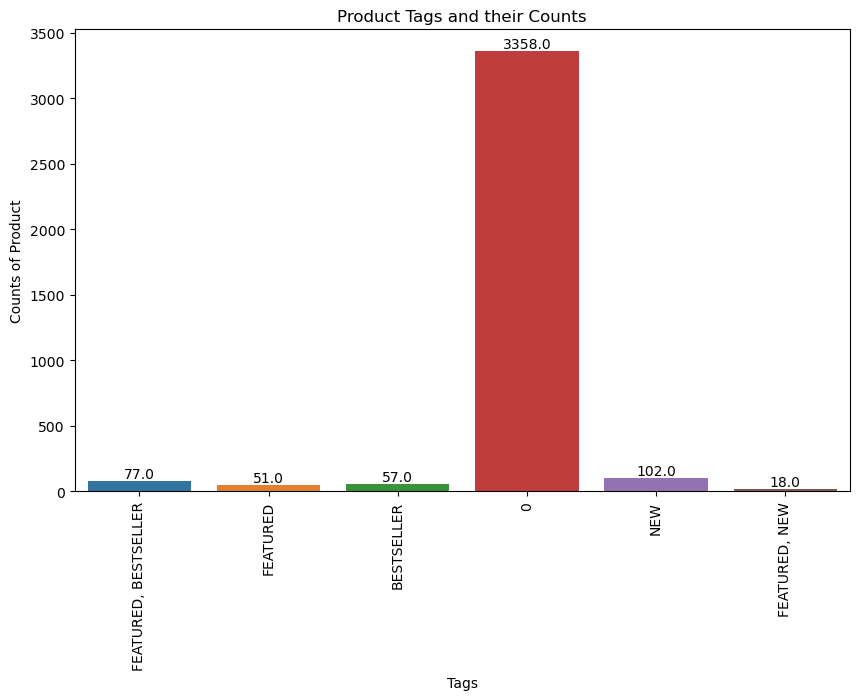

In [56]:
plt.figure(figsize=(10, 6))
x=popular_product['tags'].unique()
ax=sns.countplot(x='tags',data=popular_product)
plt.title('Product Tags and their Counts')
plt.xlabel('Tags')
plt.ylabel('Counts of Product')
plt.xticks(rotation=90)

#this creates a for loop and iterates over each patch i.e the bar. Later it gets the value of the x axis of ecah bar , divide it by 2 to get the center for text alaignmnet
#then it gets the height of each bar and converts it to string using the format matter to display it as text
#ha aligns horizontally in center and va aligns vertically at bottom
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='bottom')
plt.show()

##### 

##### 

##### getting the highest price in the product list and displaying the name of that product

In [57]:
a = popular_product['price'].max()  # Get the maximum value in the column
row = popular_product[popular_product['price'] == a]
value=row[['product_title']].values
print("The highest price in the set is {0} and its of the product {1} " .format(a,value))

The highest price in the set is 5375 and its of the product [['Huda Beauty Naughty Nude Eyeshadow Palette']
 ['Huda Beauty The New Nude Eyeshadow Palette']
 ['Huda Beauty Mercury Retrograde Eyeshadow Palette (16.1gm)']
 ['Huda Beauty Rose Quartz Eyeshadow Palette']
 ['Huda Beauty Empowered Eyeshadow Palette']
 ['Huda Beauty Rose Gold Palette - Remastered']
 ['Huda Beauty Desert Dusk Eyeshadow Palette']] 


##### 

##### getting the lowest price  in the product list and displaying the name of that product

In [58]:
b = popular_product['price'].min()  # Get the minimum value in the column
row = popular_product[popular_product['price'] == b]
value=row[['product_title']].values
print("The lowest price in the set is {0} and its of the product {1} " .format(b,value))

The lowest price in the set is 41 and its of the product [['Biotique Almond Oil Nourishing Bathing Bar']] 


##### 

##### getting the frequency of the ratings

In [59]:
popular_product['rating'].value_counts()

4.4    936
4.3    812
4.5    515
4.2    437
4.1    151
5.0    140
4.6    138
4.0    117
3.9     94
4.7     70
4.8     58
3.8     53
0.0     48
3.7     33
4.9     13
3.5      9
3.6      8
3.3      6
3.0      6
3.4      5
2.8      3
1.0      3
3.2      3
3.1      2
2.7      1
1.5      1
2.9      1
Name: rating, dtype: int64

##### 

##### creating an interactive function that will display rows of the rating specified by user

In [69]:
@interact(x=['0 rating', '1 rating', '2 rating', '3 rating', '4 rating', '5 rating'])
def analysis(x):
    if x == '0 rating':
        # Filter rows where rating is 0
        rows = popular_product[popular_product['rating'] == 0]
        display(rows)
        print(rows.shape)
    elif x == '1 rating':
        # Filter rows where rating is between 1.0 and 1.9
        rows = popular_product[(popular_product['rating'] >= 1.0) & (popular_product['rating'] <= 1.9)]
        display(rows)
        print(rows.shape)
    elif x == '2 rating':
        # Filter rows where rating is between 2.0 and 2.9
        rows = popular_product[(popular_product['rating'] >= 2.0) & (popular_product['rating'] <= 2.9)]
        display(rows)
        print(rows.shape)
    elif x == '3 rating':
        # Filter rows where rating is between 3.0 and 3.9
        rows = popular_product[(popular_product['rating'] >= 3.0) & (popular_product['rating'] <= 3.9)]
        display(rows)
        print(rows.shape)
    elif x == '4 rating':
        # Filter rows where rating is between 4.0 and 4.9
        rows = popular_product[(popular_product['rating'] >= 4.0) & (popular_product['rating'] <= 4.9)]
        display(rows)
        print(rows.shape)
    elif x == '5 rating':
        # Filter rows where rating is 5.0
        rows = popular_product[popular_product['rating'] == 5.0]
        display(rows)
        print(rows.shape)


interactive(children=(Dropdown(description='x', options=('0 rating', '1 rating', '2 rating', '3 rating', '4 ra…

##### 

##### 

##### creating a function that will categorize the products based on keywords into different categories as specified

In [61]:
def categorize_products(text):
    values = []

    if any(word in text.lower() for word in ['mask', 'peel']):
        values.append('Mask')

    if any(word in text.lower() for word in ['day cream', 'night cream', 'moistur', 'gel moisturizer', 'face oil']):
        values.append('Moisturizer')

    if any(word in text.lower() for word in ['face wash', 'cleansing balm', 'micellar water', 'cleansing milk']):
        values.append('Cleanser')

    if '%' in text.lower():
        values.append('Serum')

    if any(word in text.lower() for word in ['toner', 'toning']):
        values.append('Toner')

    if any(word in text.lower() for word in ['hydrating serum', 'anti-aging serum', 'vitamin c serum', 'serum']):
        values.append('Serum')

    if any(word in text.lower() for word in ['sunscreen', 'spf']):
        values.append('Sunscreen')

    if any(word in text.lower() for word in ['scrub', 'exfoliant', 'exfoliating']):
        values.append('Exfoliator')

    if 'eye' in text.lower():
        values.append('Eye Cream')

    if 'shampoo' in text.lower():
        values.append('Shampoo')

    if 'conditioner' in text.lower():
        values.append('Conditioner')

    if any(word in text.lower() for word in ['coconut oil', 'argan oil', 'hair serum', 'hair treatment oil']):
        values.append('Hair Oil')

    if any(word in text.lower() for word in ['hair styling gel', 'hair mousse', 'hair spray', 'heat protectant']):
        values.append('Styling')

    if any(word in text.lower() for word in ['parfum', 'perfume', 'mist', 'fragrance']):
        values.append('Perfumes')

    if 'brush' in text.lower():
        values.append('Makeup Brushes')

    if any(word in text.lower() for word in ['makeup sponges', 'beauty blenders', 'makeup applicators']):
        values.append('Beauty Blender')

    if any(word in text.lower() for word in ['hair straightener', 'hair curler', 'hair dryer', 'hair brushes']):
        values.append('Hair Tools')
        
    if 'tan' in text.lower():
        values.append('Tan Removal')
    if 'lipstick' in text.lower():
        values.append('LipStick')
    if 'roller' in text.lower():
        values.append('Rollers')
    if 'wipe' in text.lower():
        values.append('Wipes')
    if 'tablet' in text.lower():
        values.append('Tablets')
    if 'nail' in text.lower():
        values.append('Nail products')
    if 'soap' in text.lower():
        values.append('Soaps')
    return ', '.join(values) if values else 'Others'


##### 

##### applying this above created function on the product title and storing that value in a new column named as category

In [62]:
popular_product['category'] = popular_product['product_title'].apply(categorize_products)

In [63]:
popular_product.head(2)

,brand_name,product_id,image_url,in_stock,mrp,price,product_title,rating,rating_count,tags,product_url,listing_page_name,listing_url,listing_page_no,category
0,Herbal Essences,2659739,https://images-static.nykaa.com/media/catalog/...,True,1250,750,Herbal Essences Argan Oil Of Moroccan Shampoo ...,4.4,1008,"FEATURED, BESTSELLER",https://www.nykaa.com/herbal-essences-argan-oi...,Herbal Essences,https://www.nykaa.com/brands/herbal-essences/c...,1,"Shampoo, Conditioner, Hair Oil"
1,Herbal Essences,1290145,https://images-static.nykaa.com/media/catalog/...,True,1575,1181,Herbal Essences Aloe & Bamboo Shampoo + Condit...,4.4,1034,FEATURED,https://www.nykaa.com/herbal-essences-potent-a...,Herbal Essences,https://www.nykaa.com/brands/herbal-essences/c...,1,"Shampoo, Conditioner"


##### 

##### displaying the value count for each product category

In [64]:
popular_product['category'].value_counts()

Others                                         1442
Nail products                                   339
LipStick                                        307
Eye Cream                                       281
Moisturizer                                     131
                                               ... 
Mask, Cleanser, Makeup Brushes, Tan Removal       1
Moisturizer, Toner, Exfoliator                    1
Cleanser, Serum                                   1
Mask, Soaps                                       1
Eye Cream, Hair Oil                               1
Name: category, Length: 98, dtype: int64

##### 

##### creating a bar plot visualization for top 5 categories of product

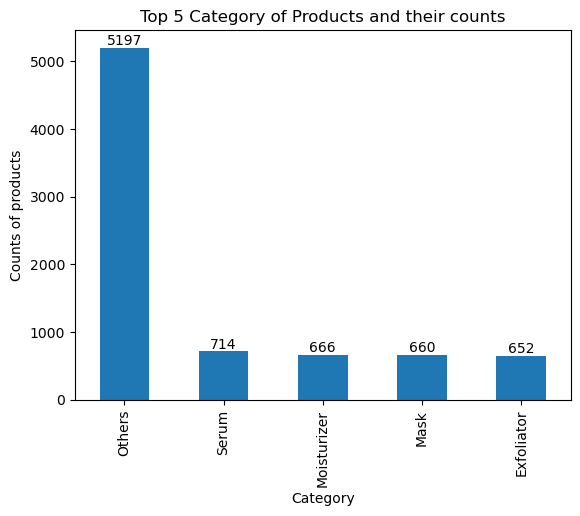

In [65]:
data1 = product_data['category'].value_counts().head(5)

# Creating the bar plot
ax = data1.plot(kind='bar')
#this creates a for loop and iterates over each patch i.e the bar. Later it gets the value of the x axis of ecah bar , divide it by 2 to get the center for text alaignmnet
#then it gets the height of each bar and converts it to string using the format matter to display it as text
#ha aligns horizontally in center and va aligns vertically at bottom
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='bottom')

# Show plot
plt.title("Top 5 Category of Products and their counts")
plt.xlabel("Category")
plt.ylabel("Counts of products")
plt.show()

##### 

##### creating a bar plot visualization for bottom 5 categories of product

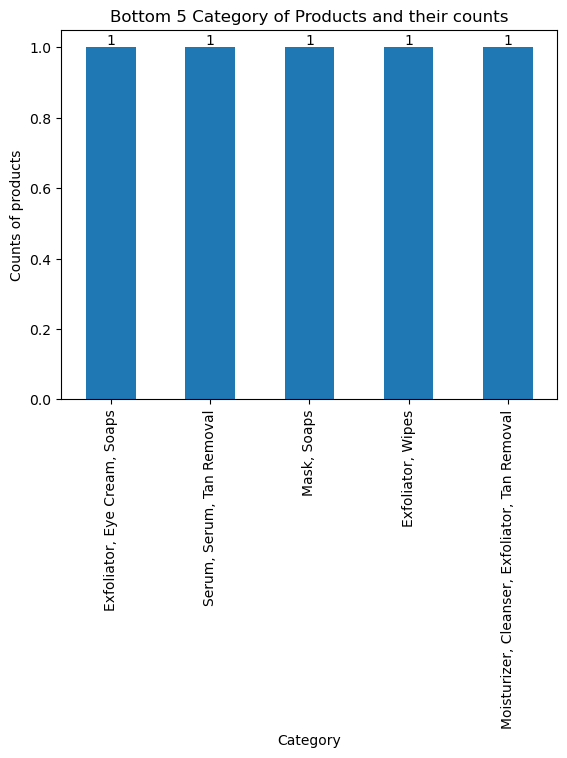

In [66]:
data1 = product_data['category'].value_counts().tail(5)

# Creating the bar plot
ax = data1.plot(kind='bar')
#this creates a for loop and iterates over each patch i.e the bar. Later it gets the value of the x axis of ecah bar , divide it by 2 to get the center for text alaignmnet
#then it gets the height of each bar and converts it to string using the format matter to display it as text
#ha aligns horizontally in center and va aligns vertically at bottom
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='bottom')

# Show plot
plt.title("Bottom 5 Category of Products and their counts")
plt.xlabel("Category")
plt.ylabel("Counts of products")
plt.show()

##### saving this above data in the desktop in the csv format to be used in PowerBI

In [ ]:
desktop_path = r'C:\Users\DELL\Desktop\project\popular_product.csv'

# Save the DataFrame to a CSV file
popular_product.to_csv(desktop_path, index=False)

##### 

##### 

### CREATING A RECOMMENDATION SYSTEM

##### LOADING THE NECEESARY LIBARRIES

In [67]:
import tkinter as tk
from tkinter import *
from PIL import Image, ImageTk #opening manipulating and displaying images
from selenium import webdriver #allows interaction with webbrowser
from selenium.webdriver.chrome.options import Options #seeting option while working with web browser
from io import BytesIO #treat binary data of image

In [ ]:
window=Tk()#initialize teh window
makeup_emoji = "\U0001F484" #makeup emoji
face_with_makeup_emoji = "\U0001F485"
nail_polish_emoji = "\U0001F485"
cosmetics_emoji = "\U0001F484"
window.title("NYKAA!"+makeup_emoji)#title for the window
window.configure(width=2000,height=500)#adjust the size of teh window
window.configure(bg="#FF1493")#adjust teh color of teh window
window.configure(borderwidth=10)#adding border to the window

frame1 = tk.Frame(window, width=1400, height=700, highlightthickness=3, highlightbackground="black",bg="#FF1493")#adding border
frame1.pack()#place in window

label=Label(window,text=cosmetics_emoji+"Nykaa Product Recommendation System!"+nail_polish_emoji,fg="black",bg="#FF1493",
            font=("Arial",40,"bold"))
label.place(x=130,y=30)#label and its placement


brands =popular_product['brand_name'].unique()

# Create a variable to store the selected option
selected_brand = tk.StringVar()  #creates a string object that stores the selecetd avlue
selected_brand.set(brands[0])  # Set the default selected option

# Create an OptionMenu widget
dropdown = tk.OptionMenu(window, selected_brand, *brands)
dropdown.pack(pady=10)
dropdown.place(x=600, y=100)


def display_images():
    selected_option = selected_brand.get() #get the selected option
    
    selected_products = popular_product[popular_product['brand_name'] == selected_option].head(12)
    #acc to the selecetd option fetches the rows from the dataset where the brand anme matched. It fteched the first 12 rows
    row, col = 0, 0  #initialize the row and col value as 0
    options = webdriver.ChromeOptions() 
    #configuring the Chrome WebDriver.It tells the function to access and initialize a connection with webbrowser
    options.add_argument('--headless')  # This line hides the browser window

    driver = webdriver.Chrome(options=options)
    #driver variable will handle the chrome, all activities
    #webdriver is used for interactive interaction with the webbrowser
    #chrome represents the web browser used here and options specify the configurations
    for index, product in selected_products.iterrows():
        try:
            # Get the URL for the product image
            image_url = product['image_url']
            
            # Fetch the image using the headless browser
            driver.get(image_url)#get the url and place it in the browser
            img_data = driver.get_screenshot_as_png()#captures the screenshot of the opened image
            img = Image.open(BytesIO(img_data)) #image is in  byte form so open it and store in a new variable
            img = img.resize((180, 180),Image.LANCZOS) #adjust the size of the stored image and the 
            #Lancoz method is used to maintain good quality of the image
            img = ImageTk.PhotoImage(img) #image is then converted into appropriate form for the tkinter display
            
            # Display image in a label
            panel = tk.Label(frame1, image=img)
            panel.image = img
            panel.grid(row=row, column=col, padx=10, pady=130)
            col += 1
            if col == 6:
                col = 0
                row += 1
        except Exception as e:
            print(f"Error loading image: {e}")
    
    driver.quit()  # Close the browser after fetching images

            
            
selected_brand.trace('w', lambda *args: display_images()) #handle changing of the brands


window.mainloop()#run main window in loop

##### 

##### 

In [4]:
import pandas as pd

# Sample data
data = {
    'Task': ['Task 1', 'Task 2', 'Task 3'],
    'Start': pd.to_datetime(['2022-01-01', '2022-02-01', '2022-03-01']),
    'Finish': pd.to_datetime(['2022-02-01', '2022-03-01', '2022-04-01'])
}

df = pd.DataFrame(data)

df.to_csv("imp_data.csv")